In [471]:
## Analyse and detect fraud users using SVC or SVM model. Thanks to Gurjevan Bhatti for suppoting this code & data exercise.

import datetime
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder

In [458]:
# Load the data
# For sample test data file, refer the path ~/SVM/data

train_data = pd.read_csv('SVM/data/fraudTest_creditcard_v2.csv')


In [459]:
# Display summary information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             79 non-null     int64  
 1   trans_date_trans_time  79 non-null     object 
 2   cc_num                 79 non-null     float64
 3   merchant               79 non-null     object 
 4   category               79 non-null     object 
 5   amt                    79 non-null     float64
 6   first                  79 non-null     object 
 7   last                   79 non-null     object 
 8   gender                 79 non-null     object 
 9   street                 79 non-null     object 
 10  city                   79 non-null     object 
 11  state                  79 non-null     object 
 12  zip                    79 non-null     int64  
 13  lat                    79 non-null     float64
 14  long                   79 non-null     float64
 15  city_pop

In [460]:
# Displays the dimensions of the dataset i.e. rows X cols
train_data.shape

(79, 23)

In [461]:
# PREPROCESS THE DATA 

#Convert date columns to DateTime Format 
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])
train_data["dob"] = pd.to_datetime(train_data["dob"])
train_data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2.291164e+15,Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3.573030e+15,Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3.598215e+15,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3.591920e+15,Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3.526826e+15,Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [462]:
# Drop irrelavent columns 
train_data.drop(columns=['Unnamed: 0','first', 'last', 'street', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
train_data.head(5)


,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2.291164e+15,Kirlin and Sons,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,3.573030e+15,Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,3.598215e+15,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,3.591920e+15,Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,3.526826e+15,Johnston-Casper,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0


In [463]:
# Drop all rows that contain missing values 
train_data.dropna()
train_data.head(5)

,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2.291164e+15,Kirlin and Sons,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,3.573030e+15,Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,3.598215e+15,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,3.591920e+15,Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,3.526826e+15,Johnston-Casper,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0


In [464]:
# Changes categorical columns into numerical ones 
# For example female is 0 and male is 1 

encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["job"] = encoder.fit_transform(train_data["job"])
train_data["city"] = encoder.fit_transform(train_data["city"])
train_data["state"] = encoder.fit_transform(train_data["state"])
train_data["cc_num"] = encoder.fit_transform(train_data["cc_num"])
train_data.head(5)

,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,31,34,6,2.86,1,15,24,33.9659,-80.9355,333497,41,1371816865,33.986391,-81.200714,0
1,39,58,6,29.84,0,1,27,40.3207,-110.4360,302,59,1371816873,39.450498,-109.960431,0
2,47,60,2,41.28,0,4,20,40.6729,-73.5365,34496,38,1371816893,40.495810,-74.196111,0
3,45,24,5,60.05,1,71,5,28.5697,-80.8191,54767,64,1371816915,28.812398,-80.883061,0
4,34,29,9,3.19,1,26,12,44.2529,-85.0170,1126,31,1371816917,44.959148,-85.884734,0


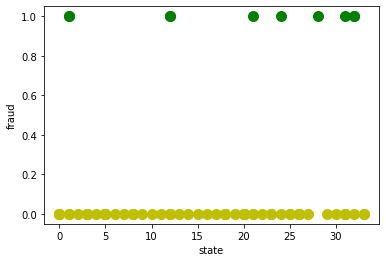

In [465]:
# see data visualization, non-fraud vs fraud
fruad = train_data.query('is_fraud == 0')[['state','is_fraud']]
non_fruad = train_data.query('is_fraud == 1')[['state','is_fraud']]
plt.xlabel('state')
plt.ylabel('fraud')
plt.scatter(fruad['state'],fruad['is_fraud'],color='y', s=100)
plt.scatter(non_fruad['state'],non_fruad['is_fraud'],color='g',s=100)

In [466]:
# SPLIT THE DATA 

# Split the data into fraud and non-fraud transactions
X = train_data.drop(columns=["is_fraud"], inplace = False)
Y = train_data["is_fraud"]

In [467]:
X.head(5)

,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long
0,31,34,6,2.86,1,15,24,33.9659,-80.9355,333497,41,1371816865,33.986391,-81.200714
1,39,58,6,29.84,0,1,27,40.3207,-110.4360,302,59,1371816873,39.450498,-109.960431
2,47,60,2,41.28,0,4,20,40.6729,-73.5365,34496,38,1371816893,40.495810,-74.196111
3,45,24,5,60.05,1,71,5,28.5697,-80.8191,54767,64,1371816915,28.812398,-80.883061
4,34,29,9,3.19,1,26,12,44.2529,-85.0170,1126,31,1371816917,44.959148,-85.884734


In [468]:
Y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [469]:
from sklearn.model_selection import train_test_split

# 80% training data, 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [470]:
from sklearn.svm import SVC
model= SVC(C=1.0,kernel='rbf',degree=3)

In [454]:
# training the model
model.fit(X_train,y_train)

SVC()

In [455]:
# check model's accuracy performance after training
model.score(X_test,y_test)

0.75

In [415]:
# test model prediction
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])